## Stress Exploratory Data Analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import session_info
from utils import apply_scaling

from jmspack.NLTSA import (ts_levels, 
                           distribution_uniformity, 
                           fluctuation_intensity, 
                           complexity_resonance, 
                           complexity_resonance_diagram,
                          cumulative_complexity_peaks,
                          cumulative_complexity_peaks_plot)

from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

In [2]:
session_info.show(write_req_file=False)

In [3]:
current_wd = os.getcwd()

In [4]:
os.chdir(current_wd + "/MyFitbitData/JamesTwose/")

In [5]:
df = pd.read_csv("Stress/Stress Score.csv")

In [6]:
os.chdir(current_wd)

In [7]:
df.columns = [x.lower() for x in df.columns]

In [8]:
df.head(2)

,date,updated_at,stress_score,sleep_points,max_sleep_points,responsiveness_points,max_responsiveness_points,exertion_points,max_exertion_points,status,calculation_failed
0,2021-06-21T00:00:00,2021-06-21T16:12:42.347,75,18,30,17,30,40,40,READY,False
1,2021-06-22T00:00:00,2021-06-22T05:49:13.557,77,20,30,17,30,40,40,READY,False


In [9]:
df = (df
 .assign(date = lambda d: pd.to_datetime(d["date"]).dt.round("d").dt.date)
 .loc[:, ["date", "stress_score", "sleep_points", "responsiveness_points", "exertion_points"]]
 .sort_values("date")
 .set_index("date")
)

In [10]:
df.head(2)

,stress_score,sleep_points,responsiveness_points,exertion_points
date,,,,
2021-06-21,75,18,17,40
2021-06-22,77,20,17,40


## Raw data heatmap

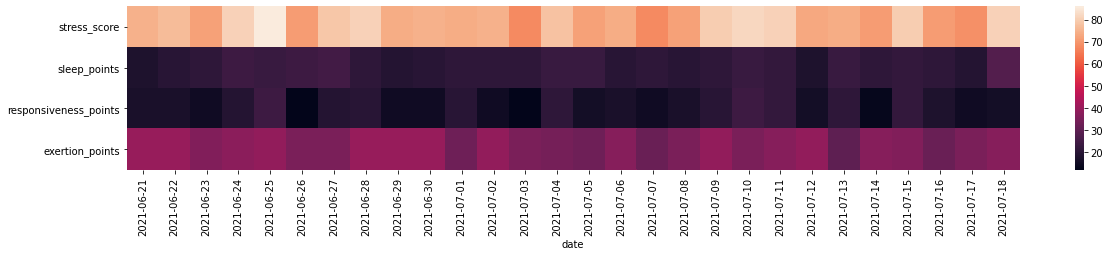

In [11]:
_ = plt.figure(figsize=(20, 3))
_ = sns.heatmap(data = df.T)

## Scaled data heatmap

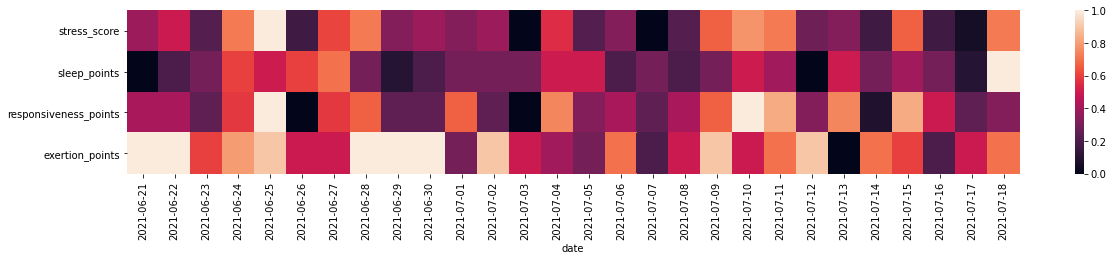

In [12]:
_ = plt.figure(figsize=(20, 3))
_ = sns.heatmap(df
                .pipe(apply_scaling)
                .T
               )

In [13]:
fi_df = fluctuation_intensity(df=df.pipe(apply_scaling), 
                      win=7, 
                      xmin=0, 
                      xmax=1, 
                      col_first=1, 
                      col_last=df.shape[1])

In [14]:
du_df = distribution_uniformity(df=df.pipe(apply_scaling), 
                      win=7, 
                      xmin=0, 
                      xmax=1, 
                      col_first=1, 
                      col_last=df.shape[1])

In [15]:
cr_df = complexity_resonance(fi_df, du_df)

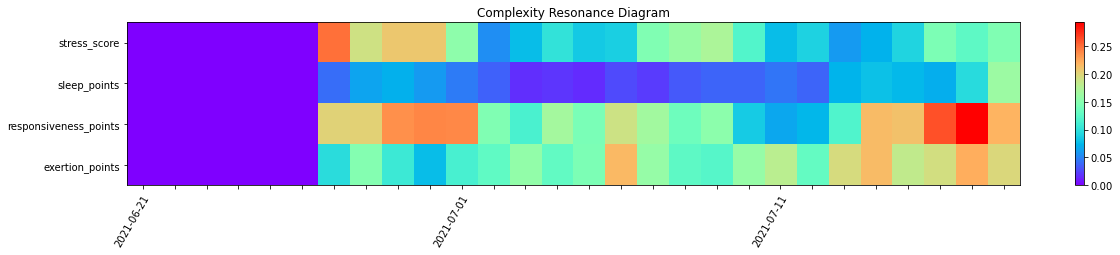

In [16]:
_ = complexity_resonance_diagram(cr_df, figsize=(20, 3))

In [17]:
cumulative_complexity_peaks_df, significant_peaks_df = cumulative_complexity_peaks(df = cr_df,
                            significant_level_item = 0.05,
                            significant_level_time = 0.05)

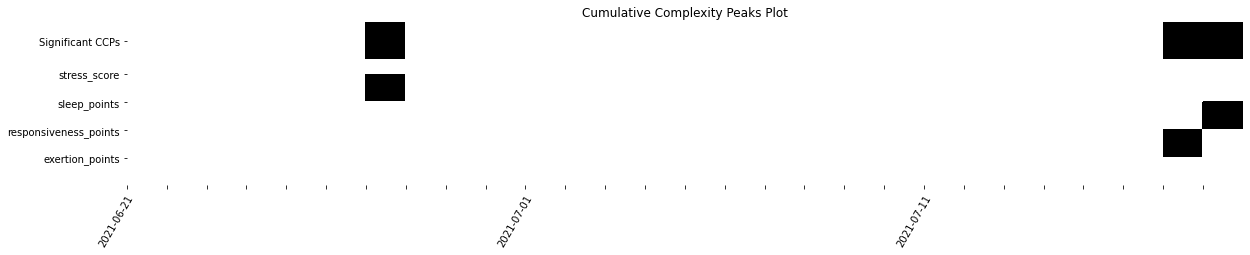

In [18]:
_ = cumulative_complexity_peaks_plot(cumulative_complexity_peaks_df=cumulative_complexity_peaks_df, 
                                     significant_peaks_df=significant_peaks_df,
                                     figsize=(20, 3))

## Dates of interest

In [19]:
significant_peaks_df[significant_peaks_df["Significant CCPs"]==1]

,Significant CCPs
2021-06-27,1.0
2021-07-17,1.0
2021-07-18,1.0


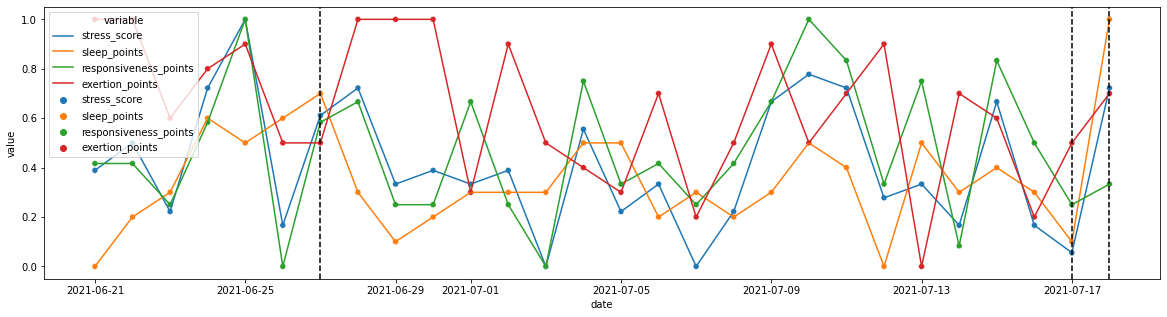

In [20]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df
 .pipe(apply_scaling)
 .reset_index()
 .melt(id_vars="date"),
                 x="date",
                 y="value",
                 hue="variable"
)
_ = sns.scatterplot(data=df
 .pipe(apply_scaling)
 .reset_index()
 .melt(id_vars="date"),
                 x="date",
                 y="value",
                 hue="variable"
)
for date in significant_peaks_df[significant_peaks_df["Significant CCPs"]==1].index.tolist():
    _ = plt.axvline(date, c="black", ls="--")

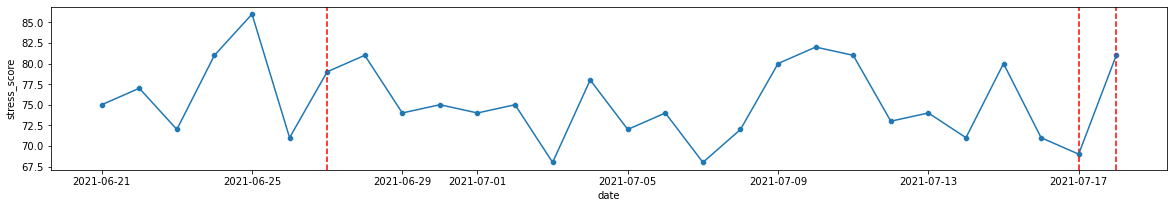

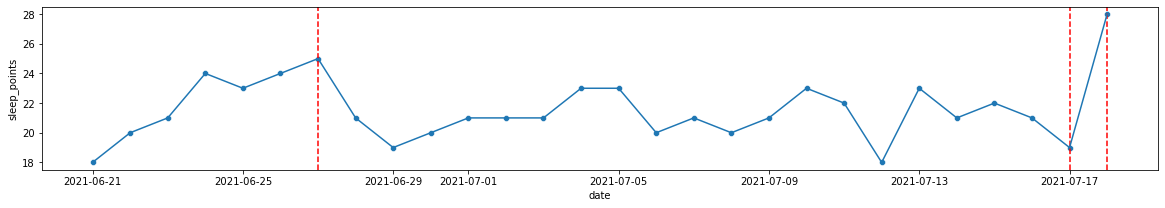

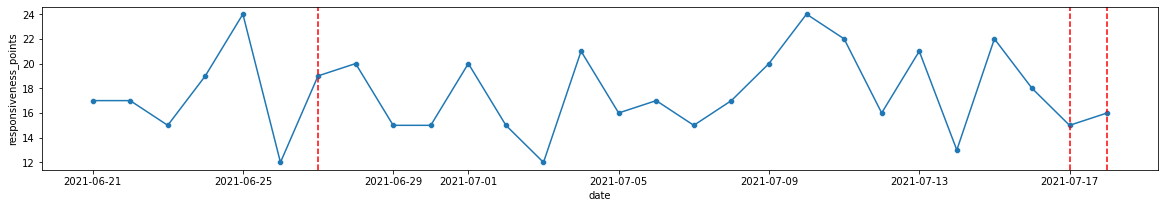

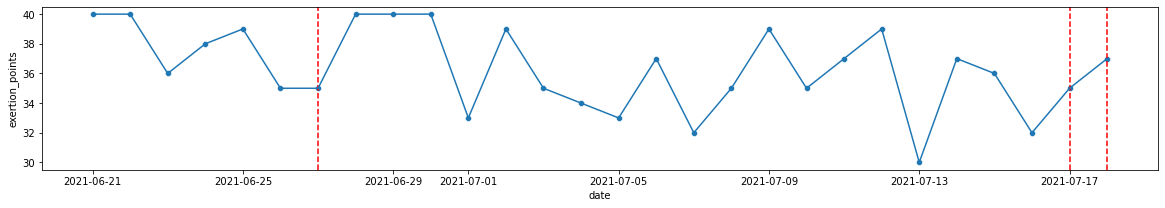

In [22]:
for col in df.columns.tolist():
    _ = plt.figure(figsize=(20, 3))
    for date in significant_peaks_df[significant_peaks_df["Significant CCPs"]==1].index.tolist():
        _ = plt.axvline(date, c="red", ls="--")
    _ = sns.lineplot(data=df
     .reset_index(),
                     x="date",
                     y=col,
    )
    _ = sns.scatterplot(data=df
     .reset_index(),
                     x="date",
                     y=col,
    )